<a href="https://colab.research.google.com/github/Tantatorn-dev/crypto_ml/blob/main/cipher_classification_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Preparation
use our generated dataset.

## Load Dataset

In [ ]:
# load dataset from Google Drive
# change directory
%cd /content/drive/My Drive/Kaggle/cipher_text_challenge

/content/drive/My Drive/Kaggle/cipher_text_challenge


In [ ]:
%ls

classic_cipher_dataset.csv  training.csv


In [ ]:
import pandas as pd

df = pd.read_csv("classic_cipher_dataset.csv")
df

,plaintext,cipher,class
0,IFYOUENJOYACTIONORIENTEDPERIODFILMSANDYOUARENT...,HQVTFPZKTVLOUHTZTCHPZUPYEPCHTYQHMDWLZYVTFLCPZU...,0
1,FORMETHISISTHEBESTROLEOFHACKMANSCAREERANDONEOF...,LAWIYJHKPKPJHYMYPJWAUYALHCVDICQPVCWYYWCQSAQYAL...,0
2,THISMOVIEWASPRETTYDARNAWFULBROOKESHIELDSACTING...,QIRZFGARPVLZTEPQQNJLEDLVHSKOEGGCPZIRPKJZLMQRDB...,0
3,GIRLSHYFINDSHAROLDLLOYDEXACTLYTHATAPOORKIDWHOW...,ERPILQKARZFLQYPVIFIIVKFDCYJGIKGQYGYBVVPXRFSQVS...,0
4,INAYEARTHATGAVEUSFORRESTGUMPPULPFICTIONANDTHES...,SJFHVFPOUFOMFBVWIQKPPVIOMWGYYWEYQSDOSKJFJTOUVI...,0
...,...,...,...
44677,WHENIHADFIRSTHEARDABOUTTHISMOVIEAROUNDABOUTLAS...,YFGKEILBGESTYOFBUALAPTSYYOGUNPZEFBTMSPBLCKQUCL...,3
44678,TWOQUESTIONSARISEWHENWATCHINGAFILMMIXINGTHESEG...,RYKTQITUHPSXFWGUFVIFMXCRHOGPFLGEANPFZGSNYOGQFH...,3
44679,THISISNOTAMOVIEFOREVERYONEESPECIALLYWITHTHEPRO...,YOGUGUOPRCNPZEFGMTKBFQCTKGGQKIDHLCCXZFYOYOIKTM...,3
44680,INTRIGINGLYCONVOLUTEDANDHAUNTINGLYREFRESHINGTH...,GPUSEHGPNGCHPOYKDSQHBLPLFCSPUHSNCXQFMWGQIESNYO...,3


## Map characters to numbers

In [ ]:
def map_char_to_num(text):
  arr = []
  for i in text:
    arr.append(ord(i)-ord('A'))
  return arr

df["plaintext"] = df["plaintext"].map(map_char_to_num)
df["cipher"] = df["cipher"].map(map_char_to_num)

In [ ]:
df.head()

,plaintext,cipher,class
0,"[8, 5, 24, 14, 20, 4, 13, 9, 14, 24, 0, 2, 19,...","[7, 16, 21, 19, 5, 15, 25, 10, 19, 21, 11, 14,...",0
1,"[5, 14, 17, 12, 4, 19, 7, 8, 18, 8, 18, 19, 7,...","[11, 0, 22, 8, 24, 9, 7, 10, 15, 10, 15, 9, 7,...",0
2,"[19, 7, 8, 18, 12, 14, 21, 8, 4, 22, 0, 18, 15...","[16, 8, 17, 25, 5, 6, 0, 17, 15, 21, 11, 25, 1...",0
3,"[6, 8, 17, 11, 18, 7, 24, 5, 8, 13, 3, 18, 7, ...","[4, 17, 15, 8, 11, 16, 10, 0, 17, 25, 5, 11, 1...",0
4,"[8, 13, 0, 24, 4, 0, 17, 19, 7, 0, 19, 6, 0, 2...","[18, 9, 5, 7, 21, 5, 15, 14, 20, 5, 14, 12, 5,...",0


Now our data is ready for our prediction models

# Exploratory Data Analysis


In [ ]:
# check max length and min length of cipher
length = df['cipher'].map(len)
length.describe()

count    44682.000000
mean       972.600801
std        722.339348
min         30.000000
25%        538.000000
50%        732.000000
75%       1171.000000
max      11089.000000
Name: cipher, dtype: float64

# Model
We'll use SVM to predict the types of cipher. We've cipher column as a feature and class column as a label.

In [ ]:
df['length'] = df['cipher'].apply(len)
df['length']

0        1585
1        1641
2        1069
3        1483
4        1254
         ... 
44677    2416
44678     708
44679     588
44680     506
44681    1096
Name: length, Length: 44682, dtype: int64

## Length 100 Ciphertext

In [ ]:
import random

# filter only ciphertext with length >= 100
desired_length = 100
desired_dataset_size = 10000

data = df[df['length']>=desired_length]

data = data.sample(frac=1)

feature = data['cipher']
label = data['class']

In [ ]:
# cut feature to desired length
def cut_to_length_n(vectors, n):
  new_vectors = []
  for vector in vectors:
    new_vectors.append(vector[0:n])
  return new_vectors

In [ ]:
feature = cut_to_length_n(feature, desired_length)

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

# we need only 1000 ciphertexts for our model according to the paper
feature = feature[0:desired_dataset_size]
label = label[0:desired_dataset_size]

feature_train, feature_test, label_train, label_test = train_test_split( feature, label, test_size=0.2, random_state=42)


In [ ]:
from sklearn import svm
import numpy as np

classifier = svm.SVC(kernel='rbf')

classifier.fit(feature_train, label_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
label_pred = classifier.predict(feature_test)

In [ ]:
# evaluation 
from sklearn.metrics import accuracy_score

# see how well our model perform
accuracy_score(label_pred, label_test)

0.613

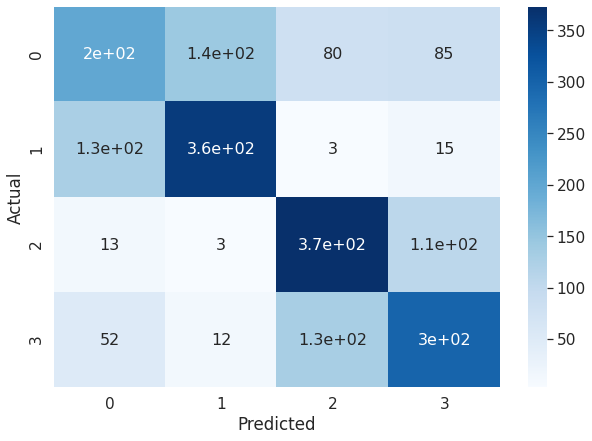

In [ ]:
# confusion matrix
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

data = confusion_matrix(label_test, label_pred)
df_cm = pd.DataFrame(data, columns=np.unique(label_100_test), index = np.unique(label_100_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

## Length 200 Ciphertext


In [ ]:
# filter only ciphertext with length >= 100
desired_length = 200

data = df[df['length']>=desired_length]

data = data.sample(frac=1)

feature = data['cipher']
label = data['class']

feature = cut_to_length_n(feature, desired_length)

In [ ]:
# we need only 1000 ciphertexts for our model according to the paper
feature = feature[0:desired_dataset_size]
label = label[0:desired_dataset_size]

feature_train, feature_test, label_train, label_test = train_test_split( feature, label, test_size=0.2, random_state=42)

In [ ]:
classifier = svm.SVC(kernel='rbf')

classifier.fit(feature_train, label_train)

label_pred = classifier.predict(feature_test)

In [ ]:
# see how well our model perform
accuracy_score(label_pred, label_test)

0.6935

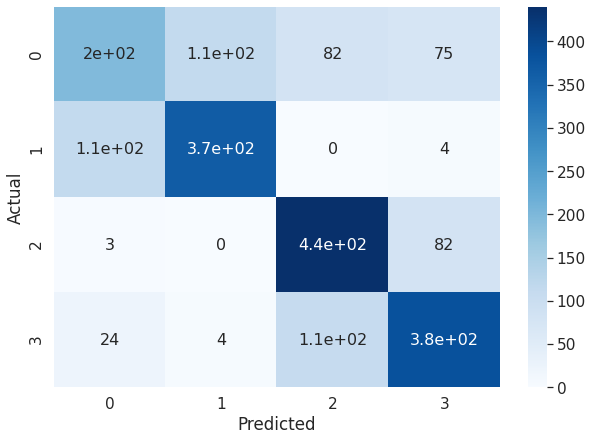

In [ ]:
# confusion matrix
data = confusion_matrix(label_test, label_pred)
df_cm = pd.DataFrame(data, columns=np.unique(label_100_test), index = np.unique(label_100_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

## Length 400 Ciphertext


In [ ]:
# filter only ciphertext with length >= 100
desired_length = 400

data = df[df['length']>=desired_length]

data = data.sample(frac=1)

feature = data['cipher']
label = data['class']

feature = cut_to_length_n(feature, desired_length)

In [ ]:
# we need only 1000 ciphertexts for our model according to the paper
feature = feature[0:desired_dataset_size]
label = label[0:desired_dataset_size]

feature_train, feature_test, label_train, label_test = train_test_split( feature, label, test_size=0.2, random_state=42)

In [ ]:
classifier = svm.SVC(kernel='rbf')

classifier.fit(feature_train, label_train)

label_pred = classifier.predict(feature_test)

In [ ]:
# see how well our model perform
accuracy_score(label_pred, label_test)

0.7695

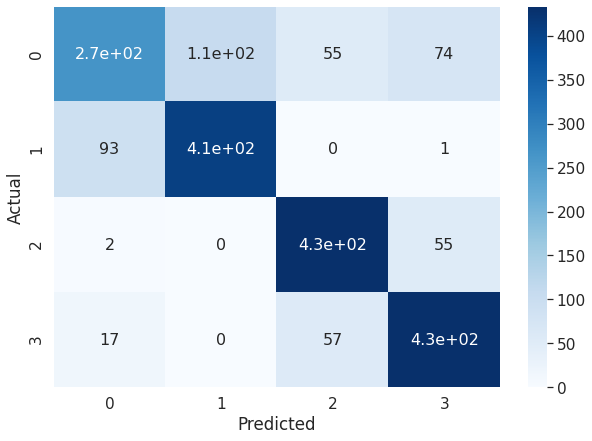

In [ ]:
# confusion matrix
data = confusion_matrix(label_test, label_pred)
df_cm = pd.DataFrame(data, columns=np.unique(label_100_test), index = np.unique(label_100_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

## Length 1000 Ciphertext

In [ ]:
# filter only ciphertext with length >= 100
desired_length = 1000

data = df[df['length']>=desired_length]

data = data.sample(frac=1)

feature = data['cipher']
label = data['class']

feature = cut_to_length_n(feature, desired_length)

In [ ]:
# we need only 1000 ciphertexts for our model according to the paper
feature = feature[0:desired_dataset_size]
label = label[0:desired_dataset_size]

feature_train, feature_test, label_train, label_test = train_test_split( feature, label, test_size=0.2, random_state=42)

In [ ]:
classifier = svm.SVC(kernel='rbf')

classifier.fit(feature_train, label_train)

label_pred = classifier.predict(feature_test)

In [ ]:
# see how well our model perform
accuracy_score(label_pred, label_test)

0.857

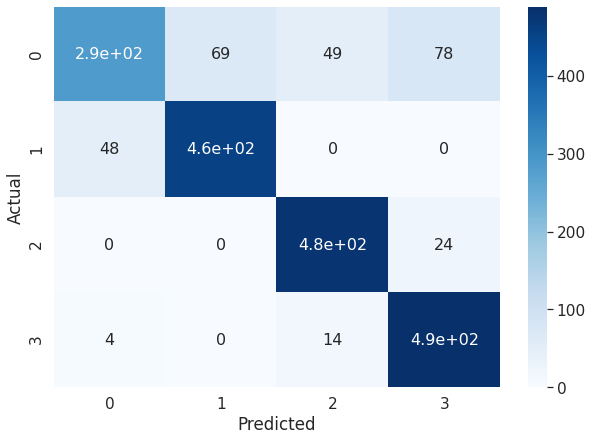

In [ ]:
# confusion matrix
data = confusion_matrix(label_test, label_pred)
df_cm = pd.DataFrame(data, columns=np.unique(label_100_test), index = np.unique(label_100_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size